# Project 1: First steps in Machine Learning (70 Points)
In this project, you will train and evaluate your first machine learning models. We provide a structure with a lot of **TODO**s guiding you through the work. Please read the following information carefully.

## Grading
You can gain a total of 70 points in this project.

Please follow the **TODO**s in this notebook. There are practical and theoretical tasks to do.<br>
When working on the tasks please consider the following information:
* write short texts in **full sentences** answering the TODOs. Note, that analyzing the theoratical parts of the project give roughly 2/3 of all points (at least in part 1)
* when describing classifiers explain at least the training, testing, and the hyper-parameters
* have a look at all imports in this notebook; they already define which method you should use


## Organizational and Deadline
On Monday, **November 13th**, there will be a Q&A session in the tutorials! Start to work on this project **from now on** and take the offer to resolve any remaining ambiguity.
This assignment is due on **November 21st**. Please upload your solution to the Lernraum+ as an ipynb-file.<br>
For a submission you need to be part of a assignment group.

# Part 1: Training your first models (45 points)

In [53]:
import numpy as np
# load dataset_1.npz
# the data and labels are saved in X and y, respectively
data_set = np.load('dataset_1.npz')
X = data_set['X']
y = data_set['y']

### The first dataset

In [74]:
# TODO: take a closer look at the dataset, e.g. number of samples, dimensionality, labels, etc.
np.set_printoptions(threshold=3)

print(X)
print("\n",y)

[[ 1.76384905  1.39722046]
 [ 0.04166092  4.08020369]
 [-0.43464679 -1.05549616]
 ...
 [-9.93429061 11.57607034]
 [-6.63306666  6.59590263]
 [-7.25102151  6.55918697]]

 [0 0 0 ... 1 1 1]


This is a preview of the first and last three rows of our dataset, we investigate more on the range of values taken

In [55]:
print(f'Maximum value of the first column {np.max(X[0])}')
print(f'Maximum value of the second column {np.max(X[1])}')

print(f'Minimum value of the first column {np.min(X[0])}')
print(f'Minimum value of the second column {np.min(X[1])}')

Maximum value of the first column -2.9073658772060376
Maximum value of the second column 4.181213856657458
Minimum value of the first column -10.448233596901602
Minimum value of the second column -3.3288798667319672


In [56]:
# Number of samples
num_samples = X.shape[0]
print(f"Number of samples: {num_samples}")

# Dimensionality of the data
dim = X.shape[1]
print(f"Dimensionality of the data: {dim}")

# Unique labels in the dataset
unique_labels = np.unique(y)
num_labels = len(unique_labels)
print(f"There are {num_labels} unique labels in the dataset: {unique_labels}")

# Count of each label (bincount counts the number of occurrencies for each value in an array)
label_counts = np.bincount(y)
# Print the count of each label (enumerate returns a tuple with the index and the value of the array)))
for label, count in enumerate(label_counts):
    print(f"Count of label {label}: {count}")

Number of samples: 800
Dimensionality of the data: 2
There are 2 unique labels in the dataset: [0 1]
Count of label 0: 400
Count of label 1: 400


We are dealing with a dataset of $800$ samples. The independent variables are $X_1$ and $X_2$ which are variables that take values in $[-10.45,-2.90]$ for $X_1$ and $[-3.33,4.18]$ for $X_2$. The dependent variable is $y$ that only takes values in $\{0,\;1\}$, we have half samples labelled with $0$ and the other half labelled with $1$.

In [57]:
num_nan_x0 = np.isnan(X[0]).sum()
num_nan_x1 = np.isnan(X[1]).sum()
num_nan_y = np.isnan(y).sum()

print(f"The number of NaNs in the dataset is {num_nan_x0} for X1, {num_nan_x1} for X2, {num_nan_y} for y")

The number of NaNs in the dataset is 0 for X1, 0 for X2, 0 for y


We have no NaNs in the dataset.

### Splitting the data

For Part 1 of the exercise, use this data split:

In [58]:
n_train = int(0.7*X.shape[0])
n_test_val = int(0.15*X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:n_train+n_test_val]
y_test = y[n_train:n_train+n_test_val]
X_val = X[n_train+n_test_val:]
y_val = y[n_train+n_test_val:]

## 1a) kNN - Classifier

### the Model

**TODO:** Describe the kNN classifier

kNN classifier is a non-parametric method. 

Given the dataset $\mathcal{D}=\{(\vec{x}_i,y_i)\in\mathbb{R}^D\times\{1,\;.\;.\;.,\;C)\}$, for a fixed $k\in\mathbb{N}_{>0}$, the idea of kNN is to estimate $\mathbb{P}(y=j|X=x_0)$ by creating a set of points close to $x_0$ to classifie the test observation $x_0$ to the class with the largest probability.

The accuracy of the classifier is defined as the percentage of ppoints which are classified correctly, i.e. $$accuracy(f,\mathcal{D})=\frac{|\{\vec{x}_i|(\vec{X}_i,y_i)\in\mathcal{D},f(\vec{x]_i)=y_i})|}{|\mathcal{D}|}$$

where for $\mathcal{D}$ we can use the training set/ test set/ validation set.

In [59]:
# TODO: Train and evaluate a kNN classifier with k=3 and report the accuracy of the model on the train, validation and test set.
#       Use the data as splitted above.

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 

# Create a kNN classifier object
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Predict the labels of the train set
y_train_pred = knn.predict(X_train)

# Predict the labels of the validation set
y_val_pred = knn.predict(X_val)

# Predict the labels of the test set
y_test_pred = knn.predict(X_test)

# Calculate and print the accuracy on the train set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {train_accuracy*100:.2f}%")

# Calculate and print the accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation accuracy: {val_accuracy*100:.2f}%")

# Calculate and print the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


Train accuracy: 96.43%
Validation accuracy: 91.67%
Test accuracy: 92.50%


**TODO:** Report your results.

The accuracy is very high for every set of samples, syntom that the model predicts good the dependent variable. As we expected the accuracy of the train set is the higher one, because the model had been trained on that specific part of the dataset.

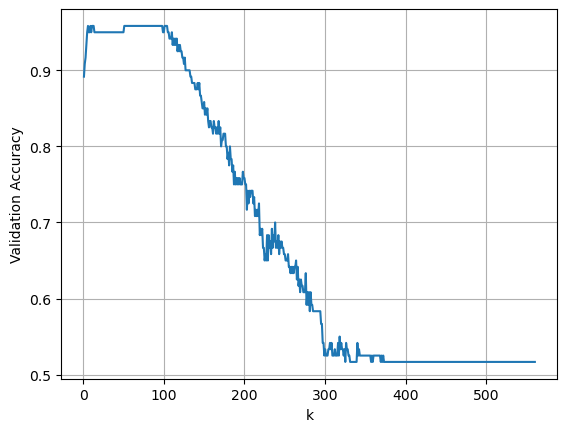

Test accuracy with optimal k = 6: 93.33%


In [60]:
# TODO: Train and test the kNN classifier for different values of k on dataset 1.
#       Use the train set to train the classifier and the validation set to evaluate the performance.
#       Plot the validation accuracy for different values of k. Choose all possible values for k.
#       Finally train the kNN classifier with the optimal k and report the accuracy on the test set.

import matplotlib.pyplot as plt
# Initialize the list of accuracies
accuracies = []

# Loop over all possible values of k
for k in range(1, X_train.shape[0]+1):
    # Create a kNN classifier object
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(X_train, y_train)

    # Predict the labels of the validation set
    y_val_pred = knn.predict(X_val)

    # Calculate the accuracy on the validation set and append it to the list of accuracies
    val_accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(val_accuracy)

# Plot the validation accuracy for different values of k
plt.plot(range(1, len(accuracies)+1), accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.grid()
plt.show()

# Find the optimal k (the one that gives the highest validation accuracy)
optimal_k = np.argmax(accuracies) + 1

# Train the kNN classifier with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Predict the labels of the test set
y_test_pred_optimal = knn_optimal.predict(X_test)

# Calculate and print the accuracy on the test set
test_accuracy_optimal = accuracy_score(y_test, y_test_pred_optimal)
print(f"Test accuracy with optimal k = {optimal_k}: {test_accuracy_optimal*100:.2f}%")


We plotted the accuracy on the validation set depending on $k$ number of neighbours taken into account during the training. As we can see we reach a high accuracy until $k = 100$ and then it starts decreasing 

**TODO:** Answer the following questions in a **full text**.

* Describe your choice of values of k. Why did you choose them?
> 
* For which values of k does the model perform best?
> 
* Would this value perform best on another dataset as well?
> 
* What is the smallest and the greatest possible value for k? What would happen if we would choose these special values?
> 

## 1b) Logistic Regression
Let's try another model as well. We will use the same dataset and split as before.

### the Model

**TODO:** Describe the logistic regression model

In [61]:
# TODO: * Train and test logistic regression on the same split of dataset_1.npz (report accuracy for train, test and validation)
#       * Plot the dataset and the decision boundary, own implementation needed (see lecture slide 52 in slides1.pdf)
#         where the decision boundary is optimized on the complete dataset (X).

from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)

#Score is a built-in function of the LogisticRegression class
train_accuracy = logisticReg.score(X_train, y_train)
test_accuracy = logisticReg.score(X_test, y_test)
val_accuracy = logisticReg.score(X_val, y_val)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Validation Accuracy: {val_accuracy}')



Train Accuracy: 0.5767857142857142
Test Accuracy: 0.44166666666666665
Validation Accuracy: 0.6166666666666667


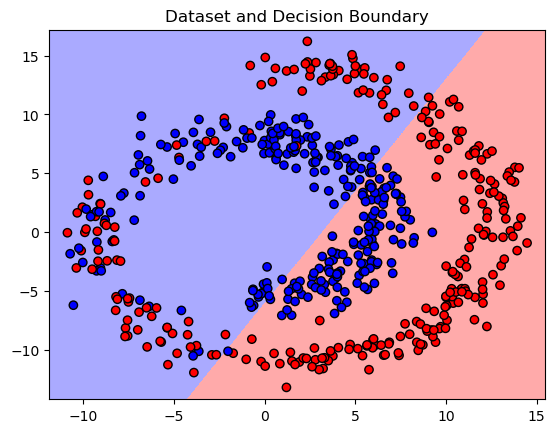

In [62]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_data_and_boundary(X, y, model):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.title("Dataset and Decision Boundary")

    plt.show()

# Use the function
plot_data_and_boundary(X_train, y_train, logisticReg)




**TODO:** How does Logistic Regression perform on this dataset? How does this relate to the properties of the model and the dataset? Answer in full sentences.


Best degree: 3 with a value of 95.00%


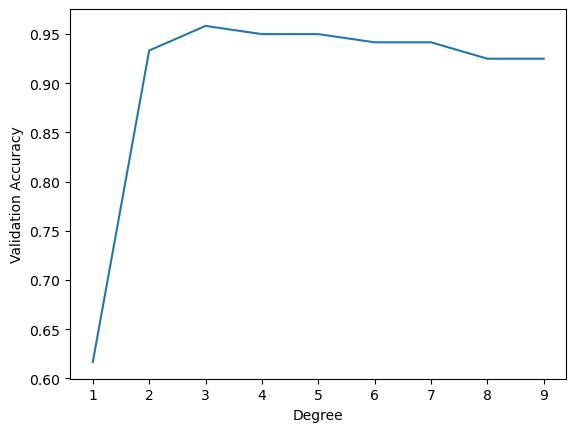

In [63]:
# TODO: To achieve better performance, we apply polynomial preprocessing before fitting logistic regression. Therefor, you may construct a pipeline as shown below.
#       Similar to kNN, optimize the polynomial degree and plot performance for different values. Pass only one degree to PolynomialFeatures (not a tuple (min,max)) at each time
#       and validate the whole pipeline!
#       Remember to use the train set for training and the validation set to determine the optimal polynomial degree.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning) ###

estimators = [('poly', PolynomialFeatures(degree=1)), ('clf', LogisticRegression(max_iter=10000))]
pipe = Pipeline(estimators)

# Define the range of degrees to test
degrees = range(1, 10)

# Initialize a list to store the validation accuracies
val_accuracies = []

# Loop over the degrees
for degree in degrees:
    # Update the degree in the pipeline
    pipe.set_params(poly__degree=degree)
    
    # Fit the pipeline on the training data
    pipe.fit(X_train, y_train)
    
    # Predict on the validation set
    y_val_pred = pipe.predict(X_val)
    
    # Compute the validation accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    # Store the validation accuracy
    val_accuracies.append(val_accuracy)

degree_best = np.argmax(val_accuracies)+1
print(f"Best degree: {degree_best} with a value of {val_accuracies[degree_best]*100:.2f}%")


plt.plot(degrees, val_accuracies)
plt.xlabel('Degree')
plt.ylabel('Validation Accuracy')
plt.show()



Test Accuracy: 0.9333333333333333


c:\Users\schin\Desktop\ML_py\MY_ML\utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: color_data['colors'][i], y)), cmap=cmap_bold, edgecolor='k', s=20)


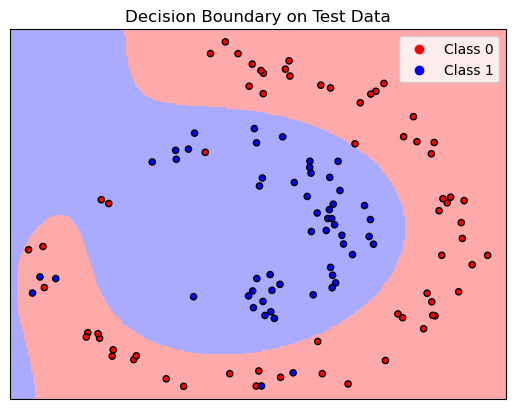

In [64]:
from utils import plot_2d_decisionboundary

# TODO: Given the best polynomial degree, train your model again, report the test accuracy and plot the decision boundary.
#       Here you can use plot_2d_decisionboundary() from utils.py, because plotting the decision boundary with preprocessing is more complicated.
#       Instead of calculating the decision boundary exactly, the function uses a grid-based approach, where each (x,y) position in the plot is colored
#       according to the prediction of the estimator given (x,y).

estimators_2 = [('poly', PolynomialFeatures(degree=degree_best)), ('clf', LogisticRegression(max_iter=100000))]
pipe_2 = Pipeline(estimators_2)
pipe_2.fit(X_train, y_train)
y_test_pred = pipe_2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

plot_2d_decisionboundary(pipe_2, X_test, y_test, title="Decision Boundary on Test Data")


**TODO:** Report your results. Answer the following questions in full sentences.

* What degrees did you try out and why?  
>

* For what degree does the pipeline perform best?  
> 

* Would this polynomial degree also perform best on another dataset?  
> 

## 1c) Comparing kNN and Logistic Regression
We want you to compare the kNN and the logistic regression classifier. For logistic regression use logistic regression with and without polynomial preprocessing. Use the previous dataset (dataset 5) and dataset 1.

**TODO:** Compare the performance of the kNN and Logistic Regression classifiers you trained before. You can skip the hyperparameter tuning and use the best k and polynomial degree from before. Therefor, a simple train-test split is sufficient (e.g. 70:30)
- compare the accuracies
- it may be useful to plot the decision boundaries for both classifiers (feel free to use plot_2d_decisionboundary() from the code snippet below)

In [65]:
# TODO: Plot the data and the decision boundary of the classifiers. plot_2d_decisionboundary() in utils.py can be used.
#       Add more code if helpful for the comparison of the classifiers. Use the datasets dataset_1.npz and dataset_2.npz

from utils import plot_classification_dataset # plot the data
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle  

def train(dataset):
    """
    Train kNN & Log.Reg. on a given dataset and plot the dataset as well as the
    model's decision boundary
    
    Params:
        dataset: name of the datase
    
    Examples:
        train('dataset_1')
    """
    
    # TODO
    
    # Load the dataset
    data = np.load(f'{dataset}.npz')
    X = data['X']
    y = data['y']

    # Split the dataset into training and testing sets
    # X, y = shuffle(X, y, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train kNN
    knn = KNeighborsClassifier(n_neighbors=optimal_k)
    knn.fit(X_train, y_train)

    # Train Logistic Regression
    logreg = LogisticRegression(max_iter=10000)
    logreg.fit(X_train, y_train)

    # Train Logistic Regression with Polynomial Preprocessing
    poly_logreg = Pipeline([('poly', PolynomialFeatures(degree=degree_best)), ('clf', LogisticRegression(max_iter=10000))])
    poly_logreg.fit(X_train, y_train)

    # Compare accuracies
    print(f'kNN Accuracy: {accuracy_score(y_test, knn.predict(X_test))}')
    print(f'Logistic Regression Accuracy: {accuracy_score(y_test, logreg.predict(X_test))}')
    print(f'Logistic Regression with Polynomial Preprocessing Accuracy: {accuracy_score(y_test, poly_logreg.predict(X_test))}')

    # Plot the data and the decision boundaries
    plot_classification_dataset(X_train, y_train, title="Training Data")
    plot_2d_decisionboundary(knn, X_train, y_train, title="kNN Decision Boundary")
    plot_2d_decisionboundary(logreg, X_train, y_train, title="Logistic Regression Decision Boundary")
    plot_2d_decisionboundary(poly_logreg, X_train, y_train, title="Logistic Regression with Polynomial Preprocessing Decision Boundary")


kNN Accuracy: 0.9291666666666667
Logistic Regression Accuracy: 0.5458333333333333
Logistic Regression with Polynomial Preprocessing Accuracy: 0.9375


c:\Users\schin\Desktop\ML_py\MY_ML\utils.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: colors[i], y)), cmap=cmap_bold, edgecolor='k', s=20)


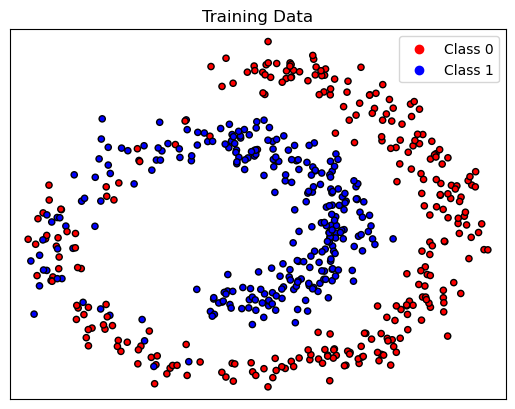

c:\Users\schin\Desktop\ML_py\MY_ML\utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: color_data['colors'][i], y)), cmap=cmap_bold, edgecolor='k', s=20)


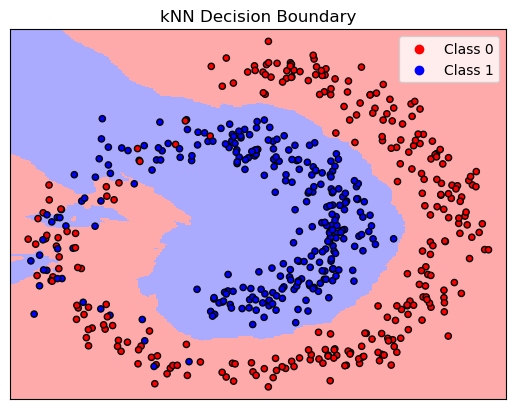

c:\Users\schin\Desktop\ML_py\MY_ML\utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: color_data['colors'][i], y)), cmap=cmap_bold, edgecolor='k', s=20)


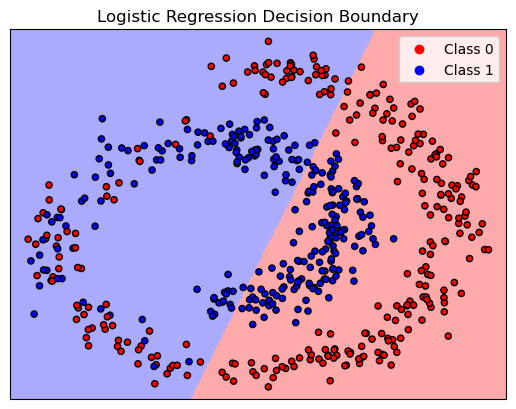

c:\Users\schin\Desktop\ML_py\MY_ML\utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: color_data['colors'][i], y)), cmap=cmap_bold, edgecolor='k', s=20)


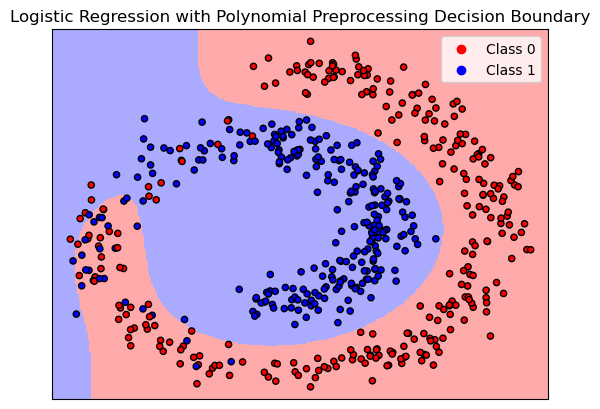

In [66]:
train("dataset_1")

kNN Accuracy: 0.9083333333333333
Logistic Regression Accuracy: 0.8958333333333334
Logistic Regression with Polynomial Preprocessing Accuracy: 0.9041666666666667


c:\Users\schin\Desktop\ML_py\MY_ML\utils.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: colors[i], y)), cmap=cmap_bold, edgecolor='k', s=20)


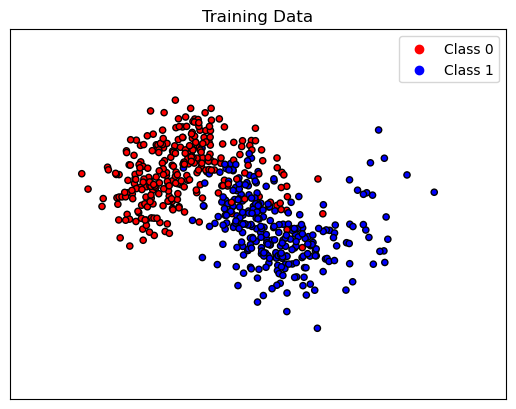

c:\Users\schin\Desktop\ML_py\MY_ML\utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: color_data['colors'][i], y)), cmap=cmap_bold, edgecolor='k', s=20)


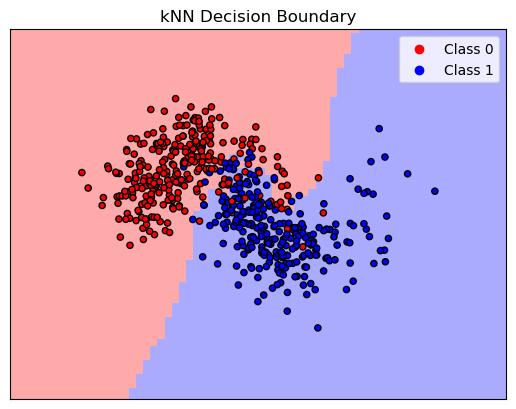

c:\Users\schin\Desktop\ML_py\MY_ML\utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: color_data['colors'][i], y)), cmap=cmap_bold, edgecolor='k', s=20)


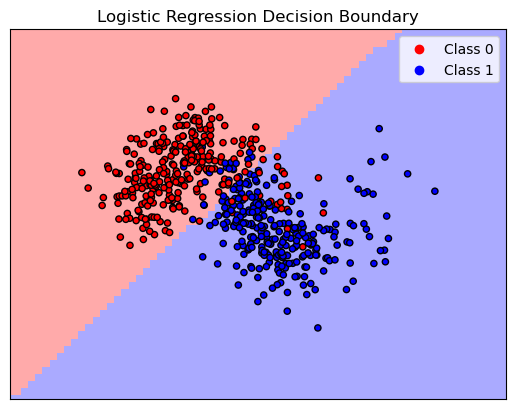

c:\Users\schin\Desktop\ML_py\MY_ML\utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: color_data['colors'][i], y)), cmap=cmap_bold, edgecolor='k', s=20)


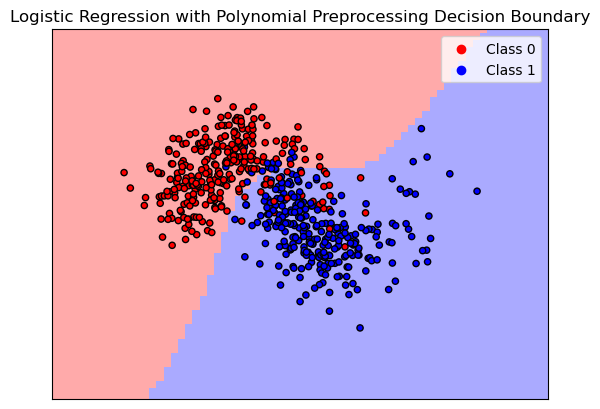

In [67]:
train("dataset_2")

**TODO:** Describe your results and analyze them: Is one model performing better than the other? Is there a difference in the datasets causing this behavior?

**Answer:**

*dataset_1*:  
...


*dataset_2*:  
...


# Part 2: Model evaluation (10 points)

Consider the following scenario: Two groups of students work on this assignment. They both use the function below to generate a train-test split and compare the performance of kNN and Logistic Regression. However both groups achieve different results. The code snippet below shows how they handled the comparison.
Fill the TODOs for training and evaluation of kNN and Logistic Regression with the given hyperparameters.

In [68]:
data_set = np.load('dataset_2.npz')
X = data_set['X']
y = data_set['y']

n = X.shape[0]

def train_knn(X_train, X_test, y_train, y_test):
    # Train a kNN classifier with k=5
    knn_comparison = KNeighborsClassifier(n_neighbors=5)
    knn_comparison.fit(X_train, y_train)

    # Report the test accuracy
    accuracy_comparison = knn.score(X_test, y_test)
    print(f'kNN Accuracy: {accuracy_comparison}')

def train_logreg(X_train, X_test, y_train, y_test):
    # Train a logistic regression pipeline with polynomial preprocessing (deg=2)
    pipe_comparison = Pipeline([('poly', PolynomialFeatures(degree=2)), ('clf', LogisticRegression(max_iter=10000))])
    pipe_comparison.fit(X_train, y_train)

    # Report the test accuracy
    accuracy_comparison = pipe_comparison.score(X_test, y_test)
    print(f'Logistic Regression Accuracy: {accuracy_comparison}')

    
def group1_eval():
    print("group1:")
    n_train = int(4*n/5)
    X_train = X[:n_train]
    X_test = X[n_train:]
    y_train = y[:n_train]
    y_test = y[n_train:]
    
    train_knn(X_train, X_test, y_train, y_test)
    train_logreg(X_train, X_test, y_train, y_test)
    
    
def group2_eval():
    print("group2")
    n_test = int(n/5)
    X_train = X[n_test:]
    X_test = X[:n_test]
    y_train = y[n_test:]
    y_test = y[:n_test]
    
    train_knn(X_train, X_test, y_train, y_test)
    train_logreg(X_train, X_test, y_train, y_test)
    
group1_eval()
group2_eval()

group1:
kNN Accuracy: 0.44375
Logistic Regression Accuracy: 0.86875
group2
kNN Accuracy: 0.54375
Logistic Regression Accuracy: 0.93125


**TODO:** Explain why they achieve different results. Can you think of any better strategy than the simple train-test split to make the results more comparable? Feel free to add some code to underline your points or show your recommended approach.

* What do you think, whose results are correct?
> 
* How could they improve their evaluation to be more confident about the results? (hint: If we make a statement like classifier 1 outperforms classifier 2 on this dataset, the statement should be representative for the whole dataset. As always, efficient solutions are preferable!)
> 

####################
The difference in results between the two groups is due to the way they split the data into training and testing sets.

Group 1 uses the first 80% of the data for training and the last 20% for testing. Group 2, on the other hand, uses the first 20% of the data for testing and the last 80% for training. If the data is ordered or has some temporal structure, these two splits will result in very different training and testing sets, which could lead to different performance results.

To make the results more comparable, a better strategy would be to use k-fold cross-validation. In k-fold cross-validation, the data is divided into k subsets. The model is then trained k times, each time using k-1 subsets for training and the remaining subset for testing. The performance is then averaged over the k iterations. This approach ensures that every data point is used for both training and testing, which provides a more robust estimate of the model’s performance.

In [69]:
# TODO: Implement your recommended approach.
from sklearn.model_selection import cross_val_score

def cross_val_knn(X, y):
    knn_cross = KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(knn_cross, X, y, cv=5)
    print(f'kNN Cross-validation Accuracy: {np.mean(scores)}')

def cross_val_logreg(X, y):
    pipe_cross = Pipeline([('poly', PolynomialFeatures(degree=2)), ('clf', LogisticRegression(max_iter=10000))])
    scores = cross_val_score(pipe_cross, X, y, cv=5)
    print(f'Logistic Regression Cross-validation Accuracy: {np.mean(scores)}')

cross_val_knn(X, y)
cross_val_logreg(X, y)

kNN Cross-validation Accuracy: 0.91625
Logistic Regression Cross-validation Accuracy: 0.9


# Part 3: Yet another Dataset (15 points)

In [70]:
# TODO: * Load dataset_3.npz (data is stored again in X and in y)
#       * Train and report the accuracy for the kNN and the logistic regression classifier. Use logistic regression without polynomial preprocessing.
#       * You may use a simple train-test split or your proposed strategy from part 2.

data_set = np.load('dataset_3.npz')
X = data_set['X']
y = data_set['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train a kNN classifier with k=5
knn_3 = KNeighborsClassifier(n_neighbors=5)
knn_3.fit(X_train, y_train)

# Train a Logistic Regression classifier
logreg_3 = LogisticRegression(max_iter=10000)
logreg_3.fit(X_train, y_train)

knn_accuracy = knn.score(X_test, y_test)
logreg_accuracy = logreg_3.score(X_test, y_test)

print(f'kNN Accuracy: {knn_accuracy}')
print(f'Logistic Regression Accuracy: {logreg_accuracy}')


kNN Accuracy: 0.85
Logistic Regression Accuracy: 0.8733333333333333


In [71]:
# TODO: Report the accuracy for each class. To report the accuracy for class i, compute the accuracy score only on samples that belong to class i.

# Get the unique classes in the target variable
classes = np.unique(y)

# For each class
for i in classes:
    # Create a mask for the current class
    mask = y_test == i

    # Calculate the accuracy for the current class
    knn_accuracy = accuracy_score(y_test[mask], knn.predict(X_test[mask]))
    logreg_accuracy = accuracy_score(y_test[mask], logreg_3.predict(X_test[mask]))

    # Print the accuracy for the current class
    print(f'Class {i} - kNN Accuracy: {knn_accuracy}')
    print(f'Class {i} - Logistic Regression Accuracy: {logreg_accuracy}')



Class 0 - kNN Accuracy: 0.0
Class 0 - Logistic Regression Accuracy: 0.4444444444444444
Class 1 - kNN Accuracy: 1.0
Class 1 - Logistic Regression Accuracy: 0.9490196078431372


**TODO:** Describe your results and analyze them: Do you observe any problematic behavior?
> 

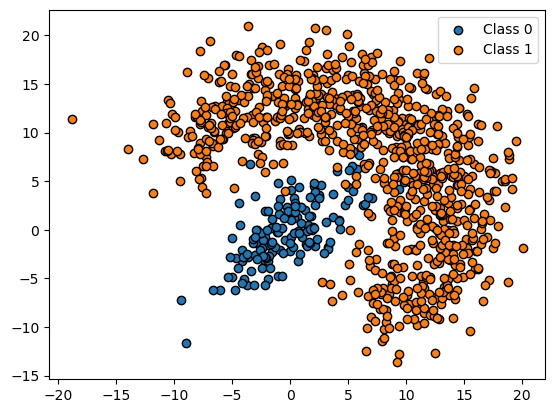

In [72]:
# TODO: analyze the dataset; focus on possible reasons for above mentioned problems.
#       You might consider plotting the data.

import matplotlib.pyplot as plt

# Assuming y contains two classes: 0 and 1
plt.scatter(X[y==0, 0], X[y==0, 1],edgecolor='k', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1],edgecolor='k', label='Class 1')

plt.legend()
plt.show()


**TODO:** Discuss the properties of the dataset and how they influence the performance of the classifiers.

> 

**TODO:** Given your results and the properties of the data, reflect on accuracy (over all classes) as a metric. Propose another metric that would be better suited for this kind of dataset and explain why. Adjustments to accuracy are fine, too.

> 


##################################
Accuracy is a common metric for classification problems. It measures the proportion of correct predictions over all predictions. However, accuracy can be misleading when the classes are imbalanced. If one class has significantly more samples than another, a model could achieve a high accuracy by simply predicting the majority class for all samples.

In such cases, other metrics might be more informative. Here are a few options:

1. **Precision**: Precision measures the proportion of true positive predictions (i.e., the model correctly predicted the positive class) among all positive predictions. It's a good metric when the cost of a false positive is high.

2. **Recall (or Sensitivity)**: Recall measures the proportion of true positive predictions among all actual positive instances. It's a good metric when the cost of a false negative is high.

3. **F1 Score**: The F1 score is the harmonic mean of precision and recall. It tries to balance the trade-off between precision and recall.

4. **Area Under the Receiver Operating Characteristic Curve (AUC-ROC)**: AUC-ROC considers the trade-off between the true positive rate (recall) and false positive rate (1 - specificity) for different threshold values. It's a good metric when both false positives and false negatives are important.

5. **Balanced Accuracy**: Balanced accuracy is the average of recall obtained on each class. It's useful for imbalanced datasets.

The choice of metric depends on the specific problem and the cost associated with different types of errors (false positives and false negatives). For example, if it's important not to miss any positive instances, you might want to optimize for recall. If it's important to be very sure about your positive predictions, you might want to optimize for precision.

In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

models = [knn, knn_optimal, logisticReg, pipe,pipe_2,knn_3, logreg_3]
model_names = ['knn', 'knn_optimal', 'logreg', 'pipe','pipe_2','knn_3', 'logreg']

for logisticReg, name in zip(models, model_names):
    y_pred = logisticReg.predict(X_test)

    print(f'Model: {name}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'AUC-ROC: {roc_auc_score(y_test, y_pred)}')
    print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}')
    print('\n')


Model: knn
Precision: 0.85
Recall: 1.0
F1 Score: 0.9189189189189189
AUC-ROC: 0.5
Balanced Accuracy: 0.5


Model: knn_optimal
Precision: 0.6020408163265306
Recall: 0.23137254901960785
F1 Score: 0.3342776203966006
AUC-ROC: 0.1823529411764706
Balanced Accuracy: 0.1823529411764706


Model: logreg
Precision: 0.7421383647798742
Recall: 0.4627450980392157
F1 Score: 0.5700483091787439
AUC-ROC: 0.2758169934640523
Balanced Accuracy: 0.2758169934640523


Model: pipe
Precision: 0.6283185840707964
Recall: 0.2784313725490196
F1 Score: 0.38586956521739135
AUC-ROC: 0.17254901960784313
Balanced Accuracy: 0.17254901960784313


Model: pipe_2
Precision: 0.58
Recall: 0.22745098039215686
F1 Score: 0.3267605633802817
AUC-ROC: 0.14705882352941177
Balanced Accuracy: 0.14705882352941177


Model: knn_3
Precision: 0.98828125
Recall: 0.9921568627450981
F1 Score: 0.990215264187867
AUC-ROC: 0.9627450980392157
Balanced Accuracy: 0.9627450980392157


Model: logreg
Precision: 0.9063670411985019
Recall: 0.94901960784313